<a href="https://colab.research.google.com/github/syaninkasheila/portofolio/blob/main/Sentimen_Analisis_Review_Aplikasi_RuangGuru_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SCRAPPING

mengambil berdasarkan score
tanggal 1 Januari - 16 Juli 2024

In [ ]:
!pip install 'google-play-scraper'

import pandas as pd
from google_play_scraper import Sort, reviews_all
from datetime import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 868.9 kB/s eta 0:00:00


In [ ]:
# Mengimpor modul drive dari google.colab
from google.colab import drive
# Menghubungkan Google Drive
drive.mount('/content/drive')

# Path ke folder di Google Drive
folder_path = '/content/drive/My Drive/analisis-sentimen/'

# Mengambil semua ulasan
result = reviews_all(
    'com.ruangguru.livestudents',
    sleep_milliseconds=0,
    lang='id',
    country='id',
    sort=Sort.NEWEST,
    filter_score_with=None
)

# Konversi hasil ke DataFrame
df = pd.DataFrame.from_records(result)

# Mrentang tanggal 1 Januari hingga 16 Juli 2024
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 7, 16)

df['at'] = pd.to_datetime(df['at'])
df_filtered = df[(df['at'] >= start_date) & (df['at'] <= end_date)]

# Memisahkan ulasan berdasarkan skor
score_groups = [1, 2, 3, 4, 5]
dfs = [df_filtered[df_filtered['score'] == score] for score in score_groups]

# Menentukan jumlah minimum ulasan per kategori skor
min_reviews = min(len(df) for df in dfs)

# Menyimpan dataset seimbang dengan jumlah ulasan yang sama per kategori skor
df_balanced = pd.concat([df.sample(n=min_reviews, random_state=42) for df in dfs])

# Hanya mengambil kolom 'review' dan 'score'
df_balanced = df_balanced[['content', 'score']]

# Menyimpan ke file TSV di Google Drive
df_balanced.to_csv(folder_path + 'ruangguru_review.tsv', sep='\t', index=False, header=None)


Mounted at /content/drive


In [ ]:
df_balanced.head(15)

,content,score
2157,Aplikasi sangat buruk Disaat login tidak ada o...,1
2758,ga jelas masa udh langganan 3 tahun jaringan b...,1
2352,Pelajar yg mencari jawaban pertanyaan di persu...,1
2811,"Super duper kecewa dengan Ruang guru,sales adm...",1
2633,Halo perkenalkan nama ku olinda awalnya aku ki...,1
3047,mohon maaf sebelumnya min. Waktu ngisi rasiona...,1
1693,Pas aku coba Ai barunya orion hapeku langsung ...,1
1844,kenapa ya.sebelum nonton clash of Champions sa...,1
1694,masa mengganti no telp tidak bisa sama Gmail j...,1
1579,mau nonton CoC baru juga di download nggak bis...,1


#PELABELAN

- score 1 dan 2 Negatif
- score 3 Netral
- score 5 Positif

In [ ]:
import pandas as pd

# Path ke file di Google Drive
file_path = '/content/drive/My Drive/analisis-sentimen/ruangguru_review.tsv'

# Membaca file TSV dari Google Drive
my_df = pd.read_csv(file_path, sep='\t')
my_df.columns = ['review_text', 'score']

# Menampilkan jumlah ulasan untuk setiap skor
score_counts = my_df['score'].value_counts().sort_index()

# Menampilkan jumlah ulasan untuk setiap skor
print(score_counts)

# Menampilkan jumlah total ulasan
total_reviews = len(my_df)
print(f'Jumlah total ulasan: {total_reviews}')


score
1    57
2    58
3    58
4    58
5    58
Name: count, dtype: int64
Jumlah total ulasan: 289


In [ ]:
def pelabelan(score):
    if score in [1, 2]:
        return 'negative'
    elif score == 3:
        return 'neutral'
    elif score in [4, 5]:
        return 'positive'


my_df['category'] = my_df ['score'].apply(pelabelan)
my_df.head(5)

,review_text,score,category
0,ga jelas masa udh langganan 3 tahun jaringan b...,1,negative
1,Pelajar yg mencari jawaban pertanyaan di persu...,1,negative
2,"Super duper kecewa dengan Ruang guru,sales adm...",1,negative
3,Halo perkenalkan nama ku olinda awalnya aku ki...,1,negative
4,mohon maaf sebelumnya min. Waktu ngisi rasiona...,1,negative


In [ ]:
my_df.head(10)

,review_text,score,category
0,ga jelas masa udh langganan 3 tahun jaringan b...,1,negative
1,Pelajar yg mencari jawaban pertanyaan di persu...,1,negative
2,"Super duper kecewa dengan Ruang guru,sales adm...",1,negative
3,Halo perkenalkan nama ku olinda awalnya aku ki...,1,negative
4,mohon maaf sebelumnya min. Waktu ngisi rasiona...,1,negative
5,Pas aku coba Ai barunya orion hapeku langsung ...,1,negative
6,kenapa ya.sebelum nonton clash of Champions sa...,1,negative
7,masa mengganti no telp tidak bisa sama Gmail j...,1,negative
8,mau nonton CoC baru juga di download nggak bis...,1,negative
9,Drill soalnya lemot,1,negative


In [ ]:
selected_columns_df = my_df[['review_text', 'category']]
selected_columns_df.head(10)

,review_text,category
0,ga jelas masa udh langganan 3 tahun jaringan b...,negative
1,Pelajar yg mencari jawaban pertanyaan di persu...,negative
2,"Super duper kecewa dengan Ruang guru,sales adm...",negative
3,Halo perkenalkan nama ku olinda awalnya aku ki...,negative
4,mohon maaf sebelumnya min. Waktu ngisi rasiona...,negative
5,Pas aku coba Ai barunya orion hapeku langsung ...,negative
6,kenapa ya.sebelum nonton clash of Champions sa...,negative
7,masa mengganti no telp tidak bisa sama Gmail j...,negative
8,mau nonton CoC baru juga di download nggak bis...,negative
9,Drill soalnya lemot,negative


In [ ]:
# Tentukan path di Google Drive Anda
file_path = '/content/drive/My Drive/analisis-sentimen/ruangguru_label.tsv'

# Simpan DataFrame ke TSV
selected_columns_df.to_csv(file_path, sep='\t', index=False)


#Import Library

In [ ]:
!git clone https://github.com/syaninkasheila/indoNLU

Cloning into 'indoNLU'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 123 (delta 17), reused 123 (delta 17), pack-reused 0 (from 0)
Receiving objects: 100% (123/123), 4.72 MiB | 21.65 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
!pip install emoji
!pip install transformers
!pip install Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import defaultdict

# NLP
import nltk
nltk.download('punkt')
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import emoji

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from wordcloud import WordCloud

#Model IndoBERT
import random
import torch
import torch.nn.functional as F
from torch import optim
from tqdm import tqdm

from transformers import BertForSequenceClassification, BertConfig, BertTokenizer
from indoNLU.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader
from indoNLU.utils.forward_fn import forward_sequence_classification
from indoNLU.utils.metrics import document_sentiment_metrics_fn


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!nvidia-smi

Sun Sep  1 17:22:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Explore Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


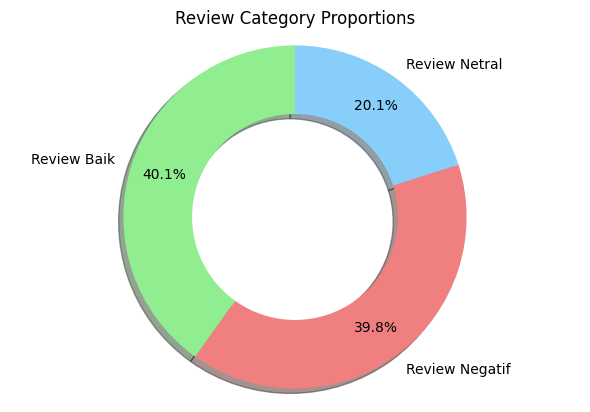

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Path ke file di Google Drive
df_path = '/content/drive/MyDrive/analisis-sentimen/ruangguru_label.tsv'
kamus_baku_path = '/content/drive/MyDrive/analisis-sentimen/kamus_baku.csv'

# Membaca file TSV dari Google Drive
df = pd.read_csv(df_path, sep='\t')
kamus_baku = pd.read_csv(kamus_baku_path)
# Function to make a donut chart
def donut(sizes, ax, angle=90, labels=None,colors=None, explode=None, shadow=None):

    # Plot
    ax.pie(sizes, colors = colors, labels=labels, autopct='%.1f%%',
           startangle = angle, pctdistance=0.8, explode = explode,
           wedgeprops=dict(width=0.4), shadow=shadow)

    # Formatting
    plt.axis('equal')
    plt.tight_layout()

# Plot arguments
sizes = df.category.value_counts()
labels = ['Review Baik', 'Review Negatif', 'Review Netral']
colors = ['lightgreen',  'lightcoral', 'lightskyblue']
explode = (0,0,0)

# Create axes
f, ax = plt.subplots(figsize=(6,4))

# plot donut
donut(sizes, ax, 90, labels, colors=colors, explode=explode, shadow=True)
ax.set_title('Review Category Proportions')

plt.show()

In [ ]:
df['category'].value_counts()

,count
category,
positive,116
negative,115
neutral,58


#Dataset Preprocessing
Case Folding

In [ ]:
import re
import numpy as np
import emoji
import pandas as pd

In [ ]:
df['review_text'] = df['review_text'].str.lower()
df.head(10)

,review_text,category
0,ga jelas masa udh langganan 3 tahun jaringan b...,negative
1,pelajar yg mencari jawaban pertanyaan di persu...,negative
2,"super duper kecewa dengan ruang guru,sales adm...",negative
3,halo perkenalkan nama ku olinda awalnya aku ki...,negative
4,mohon maaf sebelumnya min. waktu ngisi rasiona...,negative
5,pas aku coba ai barunya orion hapeku langsung ...,negative
6,kenapa ya.sebelum nonton clash of champions sa...,negative
7,masa mengganti no telp tidak bisa sama gmail j...,negative
8,mau nonton coc baru juga di download nggak bis...,negative
9,drill soalnya lemot,negative


In [ ]:
character = ['.',',',';',':','-,','...','?','!','(',')','[',']','{','}','<','>','"','/','\'','#','-','@',
             'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z',
             'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

# hapus karakter yang berulang
def repeatcharClean(text):
  for i in range(len(character)):
    charac_long = 5
    while charac_long > 2:
      char = character[i]*charac_long
      text = text.replace(char,character[i])
      charac_long -= 1
  return text

def clean_review(text):
  # ubah text menjadi huruf kecil
  # text = text.lower()
  # ubah enter menjadi spasi
  text = re.sub(r'\n', ' ', text)
  # hapus emoji
  text = emoji.demojize(text)
  text = re.sub(':[A-Za-z_-]+:', ' ', text)
  # hapus emoticon
  text = re.sub(r"([xX;:]'?[dDpPvVoO3)(])", ' ', text)
  # hapus link
  text = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})", "", text)
  # hapus usename
  text = re.sub(r"@[^\s]+[\s]?", ' ', text)
  # hapus hashtag
  text = re.sub(r'#(\S+)', r'\1', text)
  # hapus angka dan simbol (termasuk titik, koma, tanda tanya, dan tanda seru)
  text = re.sub('[^a-zA-Z]+', ' ', text)
  # hapus karakter berulang
  text = repeatcharClean(text)
  # clear spasi
  text = re.sub('[ ]+', ' ', text).strip()
  return text

def preprocess_v1(df):
  df_pp = df.copy()
  df_pp.review_text = df_pp.review_text.map(clean_review)

  # delete empty row
  df_pp.review_text.replace('', np.nan, inplace=True)
  df_pp.review_text.replace(' ', np.nan, inplace=True)
  df_pp.dropna(subset=['review_text'], inplace=True)
  return df_pp

df_v1 = preprocess_v1(df)


In [ ]:
df_v1.head(10)

,review_text,category
0,ga jelas masa udh langganan tahun jaringan bai...,negative
1,pelajar yg mencari jawaban pertanyaan di persu...,negative
2,super duper kecewa dengan ruang guru sales adm...,negative
3,halo perkenalkan nama ku olinda awalnya aku ki...,negative
4,mohon maaf sebelumnya min waktu ngisi rasional...,negative
5,pas aku coba ai barunya orion hapeku langsung ...,negative
6,kenapa ya sebelum nonton clash of champions sa...,negative
7,masa mengganti no telp tidak bisa sama gmail j...,negative
8,mau nonton coc baru juga di download nggak bis...,negative
9,drill soalnya lemot,negative


In [ ]:
# Tentukan path di Google Drive
file_path = '/content/drive/MyDrive/analisis-sentimen/df_v1.tsv'

# Simpan dataframe ke file TSV
df_v1.to_csv(file_path, sep='\t', index=False)

In [ ]:
# Tentukan path di Google Drive
file_path = '/content/drive/My Drive/analisis-sentimen/df_v1.csv'

# Simpan dataframe ke file CSV
df_v1.to_csv(file_path, index=False)


[2] Tokenisasi & Normalisasi

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membaca data dari CSV
kamus_baku_path = '/content/drive/MyDrive/analisis-sentimen/kamus_baku.csv'
kamus_baku = pd.read_csv(kamus_baku_path)

normalize_word_dict = {}
for index, row in kamus_baku.iterrows():
    if row[0] not in normalize_word_dict:
        normalize_word_dict[row[0]] = row[1]

def normalize_review(text):
  # tokenize
  list_text = word_tokenize(text)
  # ubah bahasa tidak baku

  list_text = [normalize_word_dict[term] if term in normalize_word_dict else term for term in list_text]

  # gabung kembali kalimat
  text = " ".join(list_text)
  return text

def preprocess_v2(df):
  df_pp = df.copy()
  df_pp.review_text = df_pp.review_text.map(normalize_review)

  # delete empty row
  df_pp.review_text.replace('', np.nan, inplace=True)
  df_pp.review_text.replace(' ', np.nan, inplace=True)
  df_pp.dropna(subset=['review_text'], inplace=True)
  return df_pp

# take a while
df_v2  = preprocess_v2(df_v1)

<ipython-input-21-488b62ff01ae>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalize_word_dict:
<ipython-input-21-488b62ff01ae>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalize_word_dict[row[0]] = row[1]


In [ ]:
df_v2.head(10)

,review_text,category
0,enggak jelas masa sudah langganan tahun jaring...,negative
1,pelajar yang mencari jawaban pertanyaan di per...,negative
2,super duper kecewa dengan ruang guru sales adm...,negative
3,halo perkenalkan nama ku olinda awalnya aku ki...,negative
4,mohon maaf sebelumnya min waktu ngisi rasional...,negative
5,pas aku coba ai barunya orion hapeku langsung ...,negative
6,kenapa yang sebelum menonton clash of champion...,negative
7,masa mengganti no telp tidak bisa sama gmail j...,negative
8,mau menonton coc baru juga di download enggak ...,negative
9,drill soalnya lambat,negative


In [ ]:
file_path = '/content/drive/MyDrive/analisis-sentimen/df_v2.tsv'

# dataframe ke file TSV
df_v2.to_csv(file_path, sep='\t', index=False)

In [ ]:
def make_corpus(column):

    corpus_list = []

    for text in column:
        cleaned_list = text.split(' ')
        corpus_list.extend(cleaned_list)

    # transform list of words into 1 body of text
    corpus = ' '.join(corpus_list)
    corpus = re.sub('[ ]+',' ',corpus) # replace double whitespace with one

    return corpus



In [ ]:
# Takes a while
corpus = make_corpus(df_v2.review_text)

In [ ]:
# counting unique words
corpus_set = set(corpus.split(' '))

print(f'Count of unique words in corpus: {len(corpus_set)}')

Count of unique words in corpus: 1146


In [ ]:
# function for freqdist
def word_freq(corpus, top=5):
    tokenized_word = word_tokenize(corpus)
    freqdist = FreqDist(tokenized_word)
    freqdist = freqdist.most_common(top) # list of tuples

    # decompose into label and frequency
    label = [tup[0] for tup in freqdist]
    freq = [tup[1] for tup in freqdist]
    df = pd.DataFrame({'word':label, 'freq':freq})

    return df

In [ ]:
corpus_freq = word_freq(corpus, top=20)

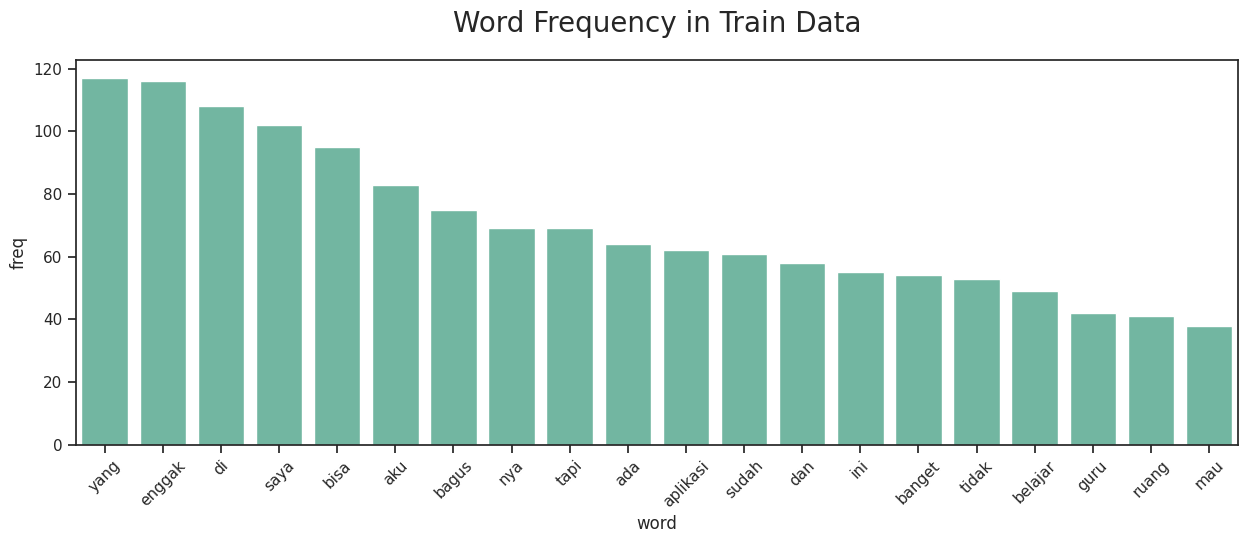

In [ ]:
# Config params
plt.style.use('default')
sns.set(style='ticks', palette='Set2')
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.titlepad'] = 20

# Compare plots of train and test corpus
f, ax1 = plt.subplots(1,figsize=(15,5))

sns.barplot(x='word', y='freq', data=corpus_freq, ax=ax1)
ax1.set_title('Word Frequency in Train Data')
ax1.tick_params(axis='x', rotation=45)

# sns.barplot(x='word', y='freq', data=corpus_freq, ax=ax2)
# ax2.set_title('Word Frequency in Train Data')
# ax2.tick_params(axis='x', rotation=45)

# sns.despine(ax=ax1)
# sns.despine(ax=ax2)
plt.show()

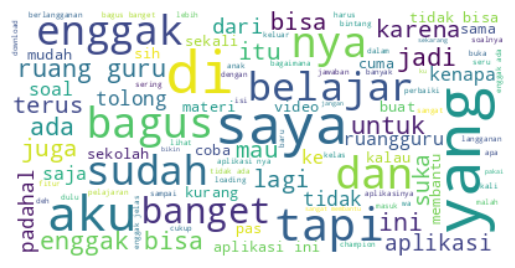

In [ ]:
# Cloud for corpus
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(corpus)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Dataset Splitting

In [ ]:
# train val split
train_set, val_set = train_test_split(df_v2, test_size=0.3, stratify=df_v2.category, random_state=1)
val_set, test_set = train_test_split(val_set, test_size=0.33, stratify=val_set.category, random_state=1)

print(f'Train shape: {train_set.shape}')
print(f'Val shape: {val_set.shape}')
print(f'Test shape: {test_set.shape}')

# export to tsv
train_set.to_csv('train_set.tsv', sep='\t', header=None, index=False)
val_set.to_csv('val_set.tsv', sep='\t', header=None, index=False)
test_set.to_csv('test_set.tsv', sep='\t', header=None, index=False)

Train shape: (201, 2)
Val shape: (58, 2)
Test shape: (29, 2)


In [ ]:
from torch.utils.data import Dataset, DataLoader


In [ ]:
class DocumentSentimentDataset(Dataset):
    # Static constant variable
    LABEL2INDEX = {'positive': 0, 'neutral': 1, 'negative': 2}
    INDEX2LABEL = {0: 'positive', 1: 'neutral', 2: 'negative'}
    NUM_LABELS = 3

    def load_dataset(self, path):
        df = pd.read_csv(path, sep='\t', header=None)
        df.columns = ['text', 'sentiment']
        df['sentiment'] = df['sentiment'].apply(lambda lab: self.LABEL2INDEX[lab])
        return df

    def __init__(self, dataset_path, tokenizer, no_special_token=False, *args, **kwargs):
        self.data = self.load_dataset(dataset_path)
        self.tokenizer = tokenizer
        self.no_special_token = no_special_token

    def __getitem__(self, index):
        data = self.data.loc[index,:]
        text, sentiment = data['text'], data['sentiment']
        subwords = self.tokenizer.encode(text, add_special_tokens=not self.no_special_token)
        return np.array(subwords), np.array(sentiment), data['text']

    def __len__(self):
        return len(self.data)


In [ ]:
class DocumentSentimentDataLoader(DataLoader):
    def __init__(self, max_seq_len=512, *args, **kwargs):
        super(DocumentSentimentDataLoader, self).__init__(*args, **kwargs)
        self.collate_fn = self._collate_fn
        self.max_seq_len = max_seq_len

    def _collate_fn(self, batch):
        batch_size = len(batch)
        max_seq_len = max(map(lambda x: len(x[0]), batch))
        max_seq_len = min(self.max_seq_len, max_seq_len)

        subword_batch = np.zeros((batch_size, max_seq_len), dtype=np.int64)
        mask_batch = np.zeros((batch_size, max_seq_len), dtype=np.float32)
        sentiment_batch = np.zeros((batch_size, 1), dtype=np.int64)

        seq_list = []
        for i, (subwords, sentiment, raw_seq) in enumerate(batch):
            subwords = subwords[:max_seq_len]
            subword_batch[i, :len(subwords)] = subwords
            mask_batch[i, :len(subwords)] = 1
            sentiment_batch[i, 0] = sentiment

            seq_list.append(raw_seq)

        return subword_batch, mask_batch, sentiment_batch, seq_list


In [ ]:
###
# common functions
###
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
    if trainable:
        return sum(p.numel() for p in module.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def metrics_to_string(metric_dict):
    string_list = []
    for key, value in metric_dict.items():
        string_list.append('{}:{:.2f}'.format(key, value))
    return ' '.join(string_list)

# Set random seed
set_seed(27)


In [ ]:
# from transformers import BertTokenizer

# # Inisialisasi tokenizer IndoBERT
# tokenizer = BertTokenizer.from_pretrained("indobenchmark/indobert-base-p1")


In [ ]:

# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
config = BertConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.num_labels = DocumentSentimentDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', config=config)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Struktur model
model
count_param(model)

124443651

#Prepare Dataset

In [ ]:
train_dataset_path = '/content/train_set.tsv'
valid_dataset_path = '/content/val_set.tsv'
test_dataset_path = '/content/test_set.tsv'

# fungsi dataset loader dari utils IndoNLU
train_dataset = DocumentSentimentDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = DocumentSentimentDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = DocumentSentimentDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = DocumentSentimentDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=True)
valid_loader = DocumentSentimentDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)
test_loader = DocumentSentimentDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)

w2i, i2w = DocumentSentimentDataset.LABEL2INDEX, DocumentSentimentDataset.INDEX2LABEL
print(w2i) #word to index
print(i2w) #index to word

{'positive': 0, 'neutral': 1, 'negative': 2}
{0: 'positive', 1: 'neutral', 2: 'negative'}


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#uji coba pre trained model

In [ ]:
text = 'Aplikasi nya jelek'
subwords = tokenizer.encode(text)
subwords = torch.LongTensor(subwords).view(1, -1).to(model.device)

logits = model(subwords)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')


Text: Aplikasi nya jelek | Label : neutral (43.483%)


#Inisialisasi Model

In [ ]:
# Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
config = BertConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.num_labels = DocumentSentimentDataset.NUM_LABELS

# Instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', config=config)

# Struktur model
print(model)

# Jumlah parameter
print(count_param(model))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

#FASE TRAINING

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
# Tentukan optimizer
optimizer = optim.Adam(model.parameters(), lr=3e-6)
model = model.cuda()

In [ ]:
def forward_sequence_classification(model, batch_data, i2w, is_test=False, device='cpu', **kwargs):
    # Unpack batch data
    if len(batch_data) == 3:
        (subword_batch, mask_batch, label_batch) = batch_data
        token_type_batch = None
    elif len(batch_data) == 4:
        (subword_batch, mask_batch, token_type_batch, label_batch) = batch_data

    # Prepare input & label
    subword_batch = torch.LongTensor(subword_batch)
    mask_batch = torch.FloatTensor(mask_batch)
    token_type_batch = torch.LongTensor(token_type_batch) if token_type_batch is not None else None
    label_batch = torch.LongTensor(label_batch)
    if device == "cuda":
        subword_batch = subword_batch.cuda()
        mask_batch = mask_batch.cuda()
        token_type_batch = token_type_batch.cuda() if token_type_batch is not None else None
        label_batch = label_batch.cuda()

    # Forward model
    outputs = model(subword_batch, attention_mask=mask_batch, token_type_ids=token_type_batch, labels=label_batch)
    loss, logits = outputs[:2]

    # generate prediction & label list
    list_hyp = []
    list_label = []
    hyp = torch.argmax(logits, 1)
    for j in range(len(hyp)):
        list_hyp.append(i2w[hyp[j].item()])
        list_label.append(i2w[label_batch[j][0].item()])

    return loss, list_hyp, list_label


In [ ]:
# Train
n_epochs = 5
history = defaultdict(list)
for epoch in range(n_epochs):
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp_train, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Hitung skor train metrics
        list_hyp_train += batch_hyp
        list_label += batch_label

        train_pbar.set_description("(Epoch {}) TRAIN LOSS:{:.4f} LR:{:.8f}".format((epoch+1),
            total_train_loss/(i+1), get_lr(optimizer)))

    metrics = document_sentiment_metrics_fn(list_hyp_train, list_label)
    print("(Epoch {}) TRAIN LOSS:{:.4f} {} LR:{:.8f}".format((epoch+1),
        total_train_loss/(i+1), metrics_to_string(metrics), get_lr(optimizer)))

    # save train acc for learning curve
    history['train_acc'].append(metrics['ACC'])

    # Evaluate di validation set
    model.eval()
    torch.set_grad_enabled(False)

    total_loss, total_correct, total_labels = 0, 0, 0
    list_hyp, list_label = [], []

    pbar = tqdm(valid_loader, leave=True, total=len(valid_loader))
    for i, batch_data in enumerate(pbar):
        batch_seq = batch_data[-1]
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Hitung total loss
        valid_loss = loss.item()
        total_loss = total_loss + valid_loss

        # Hitung skor evaluation metrics
        list_hyp += batch_hyp
        list_label += batch_label
        metrics = document_sentiment_metrics_fn(list_hyp, list_label)

        pbar.set_description("VALID LOSS:{:.4f} {}".format(total_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1),
        total_loss/(i+1), metrics_to_string(metrics)))

    # save validation acc for learning curve
    history['val_acc'].append(metrics['ACC'])

(Epoch 1) TRAIN LOSS:1.1152 LR:0.00000300: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]


(Epoch 1) TRAIN LOSS:1.1152 ACC:0.29 F1:0.22 REC:0.25 PRE:0.20 LR:0.00000300


  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:1.1249 ACC:0.31 F1:0.24 REC:0.28 PRE:0.21:  50%|█████     | 1/2 [00:00<00:00,  1.25it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

(Epoch 1) VALID LOSS:1.0855 ACC:0.29 F1:0.22 REC:0.25 PRE:0.20


  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 2) TRAIN LOSS:1.0351 LR:0.00000300: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(Epoch 2) TRAIN LOSS:1.0351 ACC:0.47 F1:0.35 REC:0.39 PRE:0.31 LR:0.00000300


  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:1.0770 ACC:0.59 F1:0.45 REC:0.54 PRE:0.41:  50%|█████     | 1/2 [00:00<00:00,  1.24it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

(Epoch 2) VALID LOSS:1.0420 ACC:0.53 F1:0.40 REC:0.45 PRE:0.37


  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 3) TRAIN LOSS:0.9981 LR:0.00000300: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(Epoch 3) TRAIN LOSS:0.9981 ACC:0.53 F1:0.39 REC:0.44 PRE:0.36 LR:0.00000300


  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:1.0381 ACC:0.56 F1:0.43 REC:0.50 PRE:0.40:  50%|█████     | 1/2 [00:00<00:00,  1.15it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

(Epoch 3) VALID LOSS:1.0089 ACC:0.55 F1:0.41 REC:0.46 PRE:0.38


  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 4) TRAIN LOSS:0.9598 LR:0.00000300: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(Epoch 4) TRAIN LOSS:0.9598 ACC:0.63 F1:0.47 REC:0.53 PRE:0.42 LR:0.00000300


  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:0.9983 ACC:0.59 F1:0.45 REC:0.53 PRE:0.41:  50%|█████     | 1/2 [00:00<00:00,  1.27it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

(Epoch 4) VALID LOSS:0.9830 ACC:0.59 F1:0.44 REC:0.49 PRE:0.39


  0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
(Epoch 5) TRAIN LOSS:0.9135 LR:0.00000300: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(Epoch 5) TRAIN LOSS:0.9135 ACC:0.64 F1:0.48 REC:0.54 PRE:0.43 LR:0.00000300


  0%|          | 0/2 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
VALID LOSS:0.9562 ACC:0.59 F1:0.45 REC:0.53 PRE:0.40:  50%|█████     | 1/2 [00:01<00:01,  1.17s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Undefine

(Epoch 5) VALID LOSS:0.9556 ACC:0.59 F1:0.44 REC:0.49 PRE:0.39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


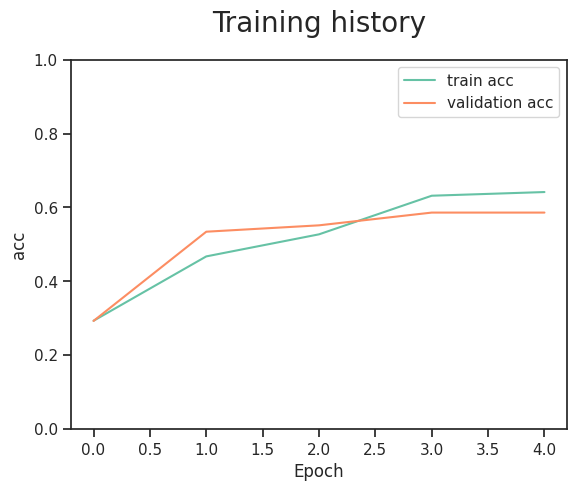

In [ ]:
plt.plot(history['train_acc'], label='train acc')
plt.plot(history['val_acc'], label='validation acc')
plt.title('Training history')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
# Simpan Hasil Prediksi Validation Set
val_df = pd.read_csv(valid_dataset_path, sep='\t', names=['review_text', 'category'])
val_df['pred'] = list_hyp
val_df.head()
val_df.to_csv('val result.csv', index=False)

In [ ]:
# Prediksi test set
model.eval()
torch.set_grad_enabled(False)

total_loss, total_correct, total_labels = 0, 0, 0
pred, list_label = [], []

pbar = tqdm(test_loader, leave=True, total=len(test_loader))
for i, batch_data in enumerate(pbar):
    _, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    pred += batch_hyp

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


In [ ]:
text = 'jelek banget aplikasinya'
subwords = tokenizer.encode(text)
subwords = torch.LongTensor(subwords).view(1, -1).to(model.device)

logits = model(subwords)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')


Text: jelek banget aplikasinya | Label : positive (44.467%)


In [ ]:
text = 'bagus banget aplikasi nya'
subwords = tokenizer.encode(text)
subwords = torch.LongTensor(subwords).view(1, -1).to(model.device)

logits = model(subwords)[0]
label = torch.topk(logits, k=1, dim=-1)[1].squeeze().item()

print(f'Text: {text} | Label : {i2w[label]} ({F.softmax(logits, dim=-1).squeeze()[label] * 100:.3f}%)')


Text: bagus banget aplikasi nya | Label : positive (66.399%)


In [ ]:
# Simpan prediksi test set
test_df = pd.read_csv(test_dataset_path, sep='\t', names=['review_text', 'category'])
test_df['pred'] = pred
test_df.head()
test_df.to_csv('test result.csv', index=False)

#Evaluasi

In [ ]:
val_real = val_df.category
val_pred = val_df.pred

test_real = test_df.category
test_pred = test_df.pred

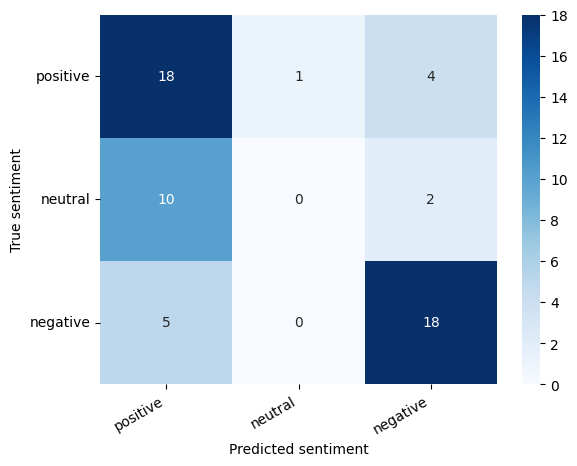

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(val_real, val_pred)
df_cm = pd.DataFrame(cm, index=['positive', 'neutral', 'negative'], columns=['positive', 'neutral', 'negative'])
show_confusion_matrix(df_cm)

In [ ]:
print(classification_report(val_real, val_pred, target_names=['positive', 'neutral', 'negative']))

              precision    recall  f1-score   support

    positive       0.55      0.78      0.64        23
     neutral       0.00      0.00      0.00        12
    negative       0.75      0.78      0.77        23

    accuracy                           0.62        58
   macro avg       0.43      0.52      0.47        58
weighted avg       0.51      0.62      0.56        58

